# [IAPR 2020:][iapr2020] Lab 2 ‒  Object description

**Authors:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 24.04.2020

[iapr2020]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

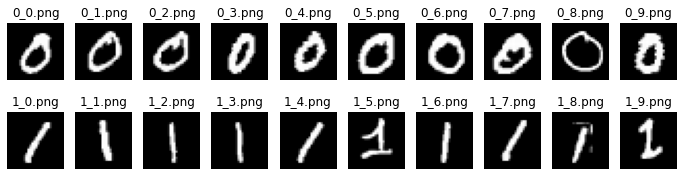

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, 'part1', '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, 'part1', '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors
Add your implementation and discussion

### 1.3 Additional method(s)
Add your implementation and discussion

## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

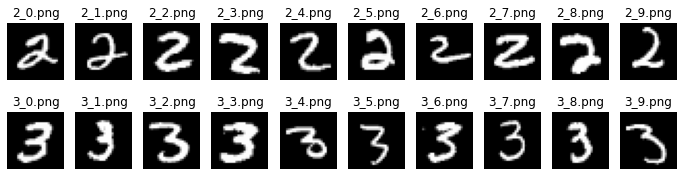

In [3]:
#  Load twos
twos_path = os.path.join(data_base_path, data_folder, 'part2', '2')
twos_names = [nm for nm in os.listdir(twos_path) if '.png' in nm]  # make sure to only load .png
twos_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(twos_path, nm) for nm in twos_names])
twos_im = skimage.io.concatenate_images(ic)
#  Load threes
threes_path = os.path.join(data_base_path, data_folder, 'part2', '3')
threes_names = [nm for nm in os.listdir(threes_path) if '.png' in nm]  # make sure to only load .png
threes_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(threes_path, nm) for nm in threes_names]))
threes_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Additional method(s) and conclusion
Add your implementations and discussions here

Let's have a look on all the digits and their contours. 

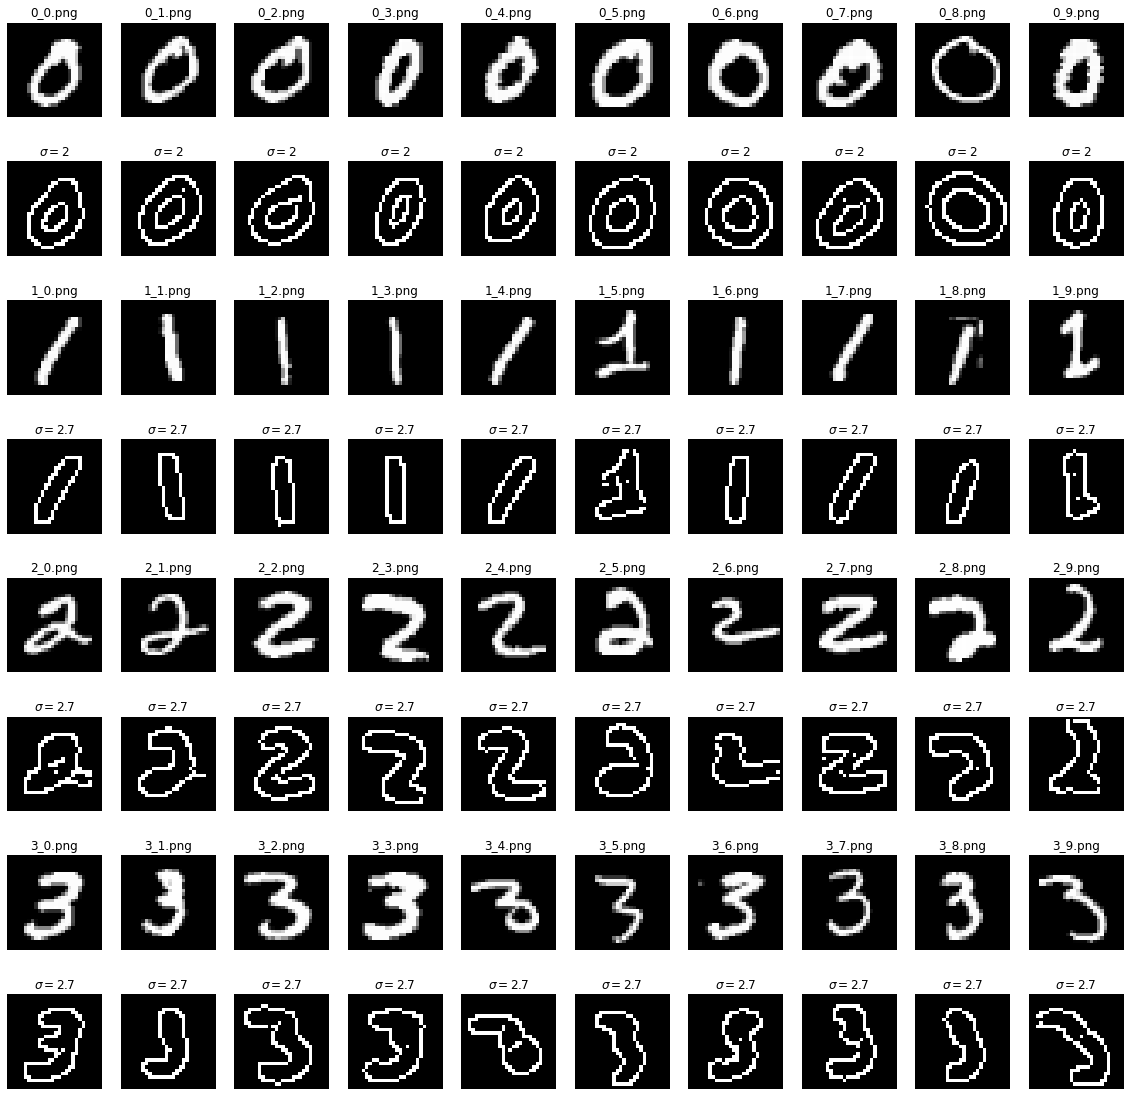

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2
from skimage import feature

zeros_im_filtres_contours=[] #contours of zeros images
ones_im_filtres_contours=[] #contours of ones images
twos_im_filtres_contours = []
threes_im_filtres_contours = []



# Plot images
fig, axes = plt.subplots(8, len(zeros_im), figsize=(20, 20))

for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
    
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    ones_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')

    
for ax, im, nm in zip(axes[4], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[5], twos_im, twos_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    twos_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')    
    
    
for ax, im, nm in zip(axes[6], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[7], threes_im, threes_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    threes_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')    
    
    
    
plt.show()

Using the same process as in part 1 here we compute the Fourier descriptors from the contours

In [5]:
## Fourier transform
from scipy.linalg import dft

def get_fourier_descriptors(contours, nb_descriptors = 2):
    u_=[] 
    u_dft=[]
    
    for c in contours:
        u_+= [c[k,0]+c[k,1]*1j for k in range(len(c))]
        x=np.array([c[0,k]+c[1,k]*1j for k in range(len(c[0]))])
        m = dft(len(x))
        list_fourier = m.dot(x)
        u_dft +=[list_fourier[0:nb_descriptors]]
        amp = np.abs(np.array(u_dft))
    
    return u_, u_dft, amp

In [6]:
u_0, u_0_dft, amp0 = get_fourier_descriptors(zeros_im_filtres_contours)
u_1, u_1_dft, amp1 = get_fourier_descriptors(ones_im_filtres_contours)
u_2, u_2_dft, amp2 = get_fourier_descriptors(twos_im_filtres_contours)
u_3, u_3_dft, amp3 = get_fourier_descriptors(threes_im_filtres_contours)


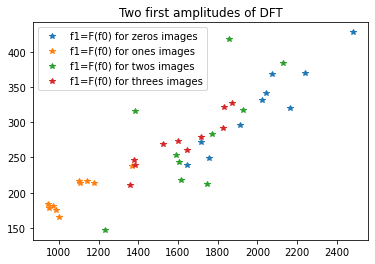

In [7]:
plt.plot(amp0[:,0],amp0[:,1],'*', label='f1=F(f0) for zeros images')
plt.plot(amp1[:,0],amp1[:,1],'*', label='f1=F(f0) for ones images')
plt.plot(amp2[:,0],amp2[:,1],'*', label='f1=F(f0) for twos images')
plt.plot(amp3[:,0],amp3[:,1],'*', label='f1=F(f0) for threes images')

plt.legend()
plt.title("Two first amplitudes of DFT")
plt.show()

As we can see by ploting the first twos amplitudes of the Fourier descriptors we can not discriminate the fourth different digits. It seems that the 0s and the 1s are still well separate but the 2s and 3s are not discriminate

To bypass this problem we tried to use more than two amplitude and then used a dimension reduction algotithm to compute a 2d feature vector. Then we can simply plot this 2d feature vector. We first try the TSNE algorithm with the four first amplitude

In [8]:
u_0, u_0_dft, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 4)
u_1, u_1_dft, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 4)
u_2, u_2_dft, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 4)
u_3, u_3_dft, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 4)

In [9]:
from sklearn.manifold import TSNE

X0 = TSNE(n_components=2).fit_transform(amp0)
X1 = TSNE(n_components=2).fit_transform(amp1)
X2 = TSNE(n_components=2).fit_transform(amp2)
X3 = TSNE(n_components=2).fit_transform(amp3)

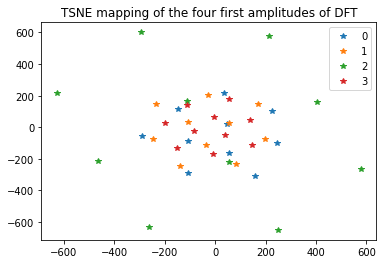

In [10]:
plt.plot(X0[:,0],X0[:,1],'*', label='0')
plt.plot(X1[:,0],X1[:,1],'*', label='1')
plt.plot(X2[:,0],X2[:,1],'*', label='2')
plt.plot(X3[:,0],X3[:,1],'*', label='3')

plt.legend()
plt.title("TSNE mapping of the four first amplitudes of DFT")
plt.show()

As we can see on the plot above the TSNE method did not work. The digits are mixed all over the plot, let's try with the 8 first amplitude 

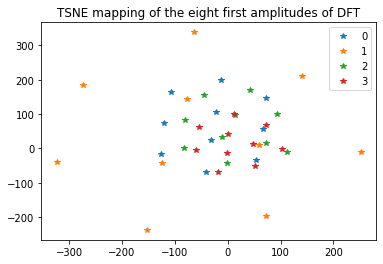

In [11]:
u_0, u_0_dft, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 8)
u_1, u_1_dft, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 8)
u_2, u_2_dft, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 8)
u_3, u_3_dft, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 8)

X0 = TSNE(n_components=2).fit_transform(amp0)
X1 = TSNE(n_components=2).fit_transform(amp1)
X2 = TSNE(n_components=2).fit_transform(amp2)
X3 = TSNE(n_components=2).fit_transform(amp3)

plt.plot(X0[:,0],X0[:,1],'*', label='0')
plt.plot(X1[:,0],X1[:,1],'*', label='1')
plt.plot(X2[:,0],X2[:,1],'*', label='2')
plt.plot(X3[:,0],X3[:,1],'*', label='3')

plt.legend()
plt.title("TSNE mapping of the eight first amplitudes of DFT")
plt.show()

Let's now try with UMAP which is an algorithm for dimension reduction based on manifold learning techniques and ideas from topological data analysis. 

/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


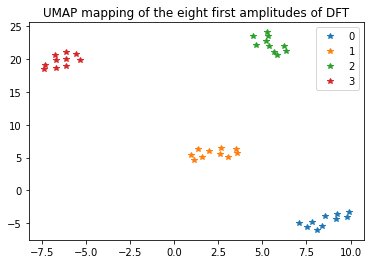

In [12]:
import umap

reducer = umap.UMAP()

u_0, u_0_dft, amp0 = get_fourier_descriptors(zeros_im_filtres_contours, 4)
u_1, u_1_dft, amp1 = get_fourier_descriptors(ones_im_filtres_contours, 4)
u_2, u_2_dft, amp2 = get_fourier_descriptors(twos_im_filtres_contours, 4)
u_3, u_3_dft, amp3 = get_fourier_descriptors(threes_im_filtres_contours, 4)

amp0 = reducer.fit_transform(amp0)
amp1 = reducer.fit_transform(amp1)
amp2 = reducer.fit_transform(amp2)
amp3 = reducer.fit_transform(amp3)

plt.plot(amp1[:,0],amp1[:,1],'*', label = '0')
plt.plot(amp2[:,0],amp2[:,1],'*', label = '1')
plt.plot(amp3[:,0],amp3[:,1],'*', label = '2')
plt.plot(amp0[:,0],amp0[:,1],'*', label = '3')

plt.legend()
plt.title("UMAP mapping of the eight first amplitudes of DFT")
plt.show()

We see that UMAP has successfully captured the digit classes. Surprinsingly the 2s and 3s clusters which previously were difficult to discriminate are not so close. We also see that the 0s cluster is more separate than the others which make sens since the 0 drawing is more different (circle for instance) as the 1,2,3 show similarities.  